# Exploring the Impact of Charismatic and Leader-Like Speakers on Their Audience

[Link to GitHub](https://github.com/spycherf/TEDTalksLeadership/)

This notebook is the final report of a data mining & machine learning semester project done by Frederic Spycher under the supervision of Prof. Michalis Vlachos (University of Lausanne).

## Project scope

Using a large amount of transcripts from TED and TEDx talks, our project aims at exploring the relationship between the use of **charismatic leadership tactics** (CLTs) and **follower reaction**. CLTs refer to speech techniques such as metaphors, stories, three-part lists, etc. (Antonakis et al., 2012). Follower reaction is an indicator of popularity derived from metrics such as the number of views or YouTube "(dis)likes".

TED talks represent good research material because, in most cases, they feature speakers trying their best to be inspiring and to convey a message. As such, they are a good place to look for CLTs.

### Background work

The project builds on previous work done by Prof. John Antonakis (University of Lausanne) and his colleagues around **leadership** and **charisma** (see Antonakis, 2006; Antonakis et al., 2016 among others).

Partnering with Prof. Antonakis, Philip N. Garner and his team from the Idiap Research Institute in Martigny (Switzerland) trained a **recurrent neural network** based on the transcripts of 240 TED talks, to estimate the usage probability of CLTs in textual data (for more details on the model, see Garner et al., 2018). The CLTs in each transcript had to be coded by hand using specific guidelines.

This deep learning model allows the **prediction of the nine CLT values** (`collective`, `contrast`, `goal`, `goals2`, `list`, `metaphor`, `moral`, `question`, `story`) for any given text. If CLTs do indeed correlate positively with the aforementioned metrics, then testing this tool on a larger data pool would be a good way of checking its performance. It may very well be that the deep learning tool requires more training data to provide more consistent and accurate results. If anything, the data collected in the scope of our project provide **more observations** to train the model (although the initial coding of CLTs would still have to be done manually).

Parting ways with the analysis based on CLTs, our data can also be used with another machine learning application, namely **IBM Watson Personality Insights**, which makes a psycholinguistic analysis of text to predict scores in each of the Big Five personality traits ([OCEAN model](https://en.wikipedia.org/wiki/Big_Five_personality_traits)), as well as some additional metrics such as consumer needs and values. It is meant to be more of a business application, but since personality traits like extroversion and openness to experience are thought to be qualities of a good leader (see works cited by Antonakis, 2006), it constitutes an interesting approach to compare with the previous one.

### Data mining efforts

The focus of this semester project was to collect the data necessary for further machine learning experimentation and analysis. The main goal was to gather **as many English transcripts as possible**.

The initial dataset was scraped directly from the **TED website**. In order to get additional metadata (mostly the number of likes and dislikes) as well as additional transcripts, we turned to **YouTube**. The advantage of YouTube is that it also provides autogenerated transcripts of reasonably good quality (as far as English is concerned).

The gathered transcripts were then fed to the IBM tool to extract the **personality profiles**.

Finally, at the request of Prof. Antonakis, we obtained estimates of the **age and gender** of the speakers. Two different approaches were used based on images and audio files, respectively.

### Further steps

By using the data output by the Idiap and IBM tools, it would be possible to train a **simpler, faster multi-target regression model** that mimics their behavior. Regression models also have the advantage of being inherently more interpretable.

All the work described above relates to textual data, but a speaker's **voice and facial expressions** are another source for the evaluation of leadership (Antonakis & Eubanks, 2017). It would be interesting to gather then analyze the audio and/or video of those same TED(x) talks. As in the project led by Garner, this would require an initial coding phase to classify talks based on certain aspects of the speaker's speech (pitch, volume, speed, tone of voice, pauses...) or appeareance (e.g. **face symmetry**). Other criteria than CLTs or personality traits would first have to be identified in order to bring that work to fruition.

## Data collection

Multiple ways of acquiring the initial TED talks metadata were explored:

* **Using an unofficial TED API**: it looked promising but was rejected because of its pricing plan and the lack of control over which metadata to extract. Besides, querying the API requires a known parameter like the name of the speaker or the YouTube ID, information that was not in our possession at the start of this project.
* **Downloading an existing dataset**: user _rounakbanik_ from Kaggle published a dataset of about 2,500 TED talks containing both metadata and transcripts. We decided not to use it because of the relatively small number of talks and the fact that it only goes until September 2017. However, we should note the presence of a feature which does not exists anymore, `ratings`. At some point, the website users were able to rate the talks using terms such as "inspiring", "fascinating", "jaw dropping", etc. These votes could be integrated at a later stage by joining the Kaggle dataset to our own, and learning the ratings for records where this feature is missing.
* **Parsing the TED RSS feed**: suggested on [StackOverflow](https://stackoverflow.com/questions/7239836/ted-talk-api-or-workaround-for-data-access), parsing the XML file of the TED talks [RSS feed](http://feeds.feedburner.com/TedtalksHD?fmt=xml) was also considered, but quickly rejected because of its short time range (one year only) and the lack of relevant metadata. 
* **Custom web scraper**: given the poor options available to us, we decided to build a custom scraper for the TED website, based on preexisting work.

### TED

The companion code of a research project named "Awe the Audience: How Emotional Trajectories Affect Audience Perception in Public Speaking", available on [GitHub](https://github.com/ROC-HCI/TEDTalk_Analytics), served as the basis for the structure of many of our scripts.

Our **web scraper**, `ted_scraper.py`, has been updated to accommodate changes done to the TED website since 2017. It goes through all possible talk IDs (61,715 at the time of the writing of this piece) and, using the `BeautifulSoup` library, parses each talk's JSON object (which is readily available in the HTML source) in order to extract the **metadata**.

A second HTTP request is sent to get the talk's **transcript**, which is found at a different URL. All the data is then saved to a CSV file. The IDs from successful and failed attempts (mostly 404 or 410 errors) are saved to log files to keep track of our progress.

The scraping took place from **March 8 to March 28 2020**. This long period of time can be explained by two factors.

First, querying the TED website is a **slow process**. As previously stated, two HTTP requests must be done for each ID (one for the metadata, the other for the transcript). Moreover, to avoid getting timed out too often, the script waits for two seconds between each request. When we _do_ get timed out, the script waits for a random number of seconds between 1 and 60.

Second, we encountered **several issues** which forced us to start over again. For example, some data would not be written correctly to the CSV file (i.e., fields being split across several lines, or some records not being written at all unless a `flush()` is performed) or some errors were not handled correctly. But more importantly, we realized only later that we would need the YouTube ID in order to supplement our dataset with the YouTube data. We noticed at the same time that the native language was also available in the JSON object. This information proved to be very valuable, because it allowed us to exclude all non-English talks (in which we were not interested).

After having crawled the entirety of the talks, we noticed that a couple of IDs redirected the user to existing videos, which produced **duplicates** that had to be removed.

#### Features

Of all the data available on the TED website, not many are of actual interest to this project, but for the sake of completeness and possible future research, we decided to gather a bit **more data than necessary**. The full list of features is as follows:

* `id`: a _numerus currens_ to uniquely identify each talk in the TED database, e.g. 30200.
* `url`
* `main_speaker`
* `title`
* `full_name`: a string containing both the main speaker's name and the title of his presentation. Note that this convention is not always respected and that sometimes the `title` also contains the speaker, or the event is included as well.
* `event`: the actual event where the talk took place, e.g. TEDxLakeComo.
* `event_type`: there are 8 different TED talk types, the most prominent of which being TED stage talks and TEDx talks.
* `description`: a small text describing the contents of the talk.
* `tags`: a semi-colon-separated list of keywords related to the talk.
* `date_recorded`
* `date_published`
* `duration`: the video's duration. Note that many talks are not hosted on the TED website but on YouTube, so this feature has a value of 0 for the majority of records. See also `ext_duration`.
* `native_language`: the language spoken in the talk. When there are multiple languages, this feature takes the value of "mul".
* `nb_languages`: the number of languages for which a transcript exists (this can be used as an indicator of popularity)
* `views`: the number of views. For the same reason as the `duration`, this often has a value of 0.
* `nb_comments`: when the comment functionality is not enabled, this gets a value of -1.
* `nb_speakers`
* `speakers`: a semi-colon-separated list of speakers.
* `speakers_desc`: a semi-colon-separated list of speaker descriptions.
* `ext_src`: the external service where videos are hosted, namely YouTube (close to 100% of talks are available on YouTube).
* `ext_id`: the external (i.e., YouTube) ID, used at a later stage to query the YouTube API.
* `ext_duration`: the YouTube video's duration, which can be used when `duration` is not available.
* `transcript`: only English transcripts are scraped.

### YouTube

Upon seeing that the TED website did not contain that many transcripts, and that most talks are actually hosted on YouTube, we decided to explore the YouTube data in the hope of **acquiring more transcripts**, as well as getting our hands on unique information, i.e. the number of **likes and dislikes** related to a TED talk.

Our script, `youtube_api_query.py`, has a similar structure to `ted_scraper.py`. However, since YouTube provides developers with an API, we extracted that data by **querying the API** instead of scraping the website. One clear advantage of this is that data can be obtained very fast without getting timed out. However, Google imposes a daily quota of 10,000 units. Knowing that each query costs 7 units, this means that only about 1,400 records can be queried per day.

The harvesting of the YouTube data started on **March 20** and ended on **April 30 2020**.

#### Metadata features

Again, for the sake of completeness, we kept more information than was actually necessary to us.

* `id`: an 11-character string that uniquely identifies the YouTube video, e.g. SEDvD1IICfE.
* `channel`: the channel where the video was uploaded.
* `title`
* `description`
* `tags`: a semi-colon-separated list of keywords related to the talk.
* `date_published`
* `views`
* `likes`
* `dislikes`
* `nb_comments`

#### Transcripts

While it is possible to get the video captions through the API as well (thanks to the `captions().download()` method), the cost of doing so is quite **prohibitive** (200 units per call). Thankfully, there are alternatives to using the YouTube Data API.

We initially extracted the captions found in the XML subtitle files, which can be retrieved with this URL format: [http://video.google.com/timedtext?lang=en&v=SEDvD1IICfE](http://video.google.com/timedtext?lang=en&v=SEDvD1IICfE).

The drawback of this solution is that it only gives access to manually uploaded transcripts. We were later informed of the existence of the `youtube-transcript-api` library, which not only allowed us to get the **autogenerated transcripts**, but also to use **Google's translation services** to get the English version of non-English transcripts (whether these are autogenerated or not).

Our script, `youtube_transcripts.py`, does precisely that. Including autogenerated and/or translated transcripts has the potential of drastically augmenting our dataset, but these come with **varying degrees of quality**. In order to keep track of the nature of each transcript (and therefore their trustworthiness), we captured key information such as whether the script was `autogenerated` (0/1) and/or `translated` (0/1), as well as the source language (2-letter ISO code).

The code for the initial solution (using XML files) is still available in `youtube_api_query.py`. We kept it there in case the aforementioned library stops working one day (it is based on the YouTube web client, which is an undocumented part of the YouTube API).

### IBM personality profiles

The personality profiles come from IBM Watson Personality Insights, a MLaaS tool that performs psycholinguistic analyses based on text data. Among many variables, the data contains the **percentile** (i.e., a value between 0 and 1 indicating where the text's author stands with regard to the total population) for each of the **Big Five personality traits** (openness, conscientiousness, extroversion, agreeableness and neuroticism).

In order to work properly, the IBM tool requires an input of **at least 100 words**. A minimum of 600 words (preferably 1,200) are needed for the service to produce statistically significant estimates.

The script used to query the IBM API is `ibm_api_query.py`. Each **JSON object** returned by the service contains the full `profile`, which is simply saved as a character string to a CSV file, along with the corresponding talk `id`. Talks containing less than 100 words are logged as failures.

Because IBM's free plan limits the number of API calls per month, several accounts were used to speed up the data collection process.

### Age and gender

At the request of Prof. Antonakis, we looked into ways of obtaining additional information about the TED(x) speakers, namely an **estimation of their age and gender**. So as not to rely solely on one service, we adopted two complementary approaches to achieve that goal.

#### Microsoft Azure Face API

The first approach consisted of using the Face API from Microsoft Azure, a tool that can **detect faces in images** and infer various attributes from them such as age, gender, mood, hair color, and many more. For each talk, we fed the API with the URLs to the **speaker's photo** (when it was available) as well as the **video thumbnail** from the TED website (these URLs were obtained using the `ted_scraper.py` script).

`azure_api_query.py` is the script used to communicate with and save results from the Face API. When a face is detected in an image, the script simply **extracts the gender and age information**. These estimates are handled as follows:

* In case of contradicting information about the gender, we assume that the photo gives a more accurate prediction than the thumbnail.
* For the age, the script simply computes the average of both estimates.
* If multiple faces are detected (a scenario which we think to be quite rare), we assume the first one to be the right one.

The free plan allows for 20 transactions per minute, so the script sleeps for 3.5 seconds before each request to avoid getting locked out.

Talks for which neither the age or gender could be retrieved were logged as failures. Otherwise, the `est_age` and `est_gender` were written to a CSV file along with the talk `id`.

This approach is **limited** because the quality of the output can only be as good as the quality of the input. In many cases, the service could not detect any faces for multiple reasons:

* Instead of a picture showing the actual speaker, the video thumbnail might be a generic slide provided for that particular TED(x) event.
* Oftentimes, the speaker photo does not exists.
* The image might be too small (the minimum detectable face size is 36 by 36 pixels).

As a result, the age and gender information are **missing** in thousands of records. A way to circumvent this problem would be to get multiple snapshots from the YouTube videos and get predictions for those. However, given the total number of records, this would most likely require a paid plan.

#### Gaussian mixture models

For **gender estimation**, we complemented our previous approach, based on image analysis, with a second one based on **audio analysis**.

To do this, we reused the work done in the [PyGender-Voice](https://github.com/abhijeet3922/PyGender-Voice/) project. The code, written for Python 2.7, had to be adapted in order to accommodate Python 3.X. In a nutshell, this script extracts speech features known as _Mel Frequency Cepstrum Coefficients_ (MFCC) from audio files; these features can be used to identify gender.

As per the author's instructions, we trained a **Gaussian mixture model** (GMM) for each gender (male/female) using Google's AudioSet (which can be downloaded [here](https://www.dropbox.com/s/sqg7az7fja6rqfw/pygender.zip?dl=0)) and saved those as .gmm files. For each talk, we downloaded the **YouTube audio** (with the help of the `youtube-dl` library) and converted it to a 16-bit WAV file using `ffmpeg` (keeping only the first 3 minutes to speed up computation). Finally, both models provided their score and the highest one determined the gender. Just like the Azure data, the `est_gender` was saved to a CSV file. When they occured, failures were primarily due to the videos being private.

After checking a few select results, we are quite confident in the **quality of the predictions**. The algorithm can sometimes be thrown off, e.g. when encountering a man singing. This is no major issue, since art performances do not interest us.

## Loading and merging the data

The data collection process resulted in the creation of **6 datasets**:

* TED
* YouTube metadata
* YouTube transcripts
* IBM personality profiles
* Azure ages and genders
* GMM genders

Since they are contained in separate CSV files, we first need to merge them. The TED dataset is considered to be the main one, the role of the others simply being to augment it.

Before running the `load_merge()` function, one has to make sure that the relative links to the data sources (found at the top of `notebook_functions.py`) are up-to-date. Absolute links to their online version can be found in this project's README, but, because of their size, we advise to download the files first, then place them in their respective output folder (or simply clone the whole project).

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
pd.set_option("display.max_columns", None)

from notebook_functions import load_merge
from notebook_functions import transcript_summary

RSEED = 42

df = load_merge()
transcript_summary(df)

ENGLISH TALKS: 39001
  w/o transcript: 4258
  w/ transcript: 34743
    from TED: 4741
    from YouTube: 30002
      manually created: 105
      autogenerated (English): 29164
      translated (Google): 1
      autogenerated then translated: 732
-----
NON-ENGLISH TALKS: 18358
  w/o transcript: 7246
  w/ English transcript: 11112
    from TED: 565
    from YouTube: 10547
      manually created: 63
      autogenerated (English): 239
      translated (Google): 1037
      autogenerated then translated: 9208
-----
TOTAL: 57359


### Transcripts: merging outcomes

Close to **68%** of the talks are spoken in **English** (39,001). TED provides a human-written transcript for about 12% of them. Another 77% was extracted from YouTube.

From the pool of _non-English_ talks (18,358 records), we could get an English transcript for about 60% of them. That being said, since we are only interested in TED talks that were originally spoken in English, we simply **disregard all non-English talks** during the cleaning phase.

At this point, we can ask ourselves the following question: was it worth querying YouTube in order to enrich our dataset? As we can see in the figures above, merging our original TED dataset with the YouTube dataset has allowed us to get the English transcript for an additional **30,002 records**. Most of these, however, were **autogenerated** and, even if Google's speech-to-text engine is quite performant, they should be taken with a grain of salt. In practical terms, this means that less weight should be given to them when building machine learning models.

## Cleaning

### Cleaning process & operations

As far as **data types** are concerned, most of the numerical data was identified as floats. We converted these features to integers because it made more sense given their nature. We also created proper date-time objects from the timestamps.

Next, we looked at **transcript quality**. We know that the TED transcripts were written by humans and therefore can be trusted. For the ones coming from YouTube, however, it's another story. From the summary statistics above, we deduce that some transcripts are probably of dubious quality and should be discarded, such as the 732 English talks that were autogenerated from a language other than English, as well as the 239 transcripts of _non-English_ talks that were autogenerated from English.

The number of characters in a transcript (without spaces) is made available in the `nb_char` feature. We also removed transcripts containing **less than 100 characters** for several reasons:

* They may contain irrelevant data like "WEBVTT".
* They may represent art performances (dance, music).
* The IBM tool requires at least 100 words to run.

Most of the remaining cleaning operations were about **unifying similar fields** from both the TED and YouTube datasets. When data from the TED dataset was missing (e.g. duration = 0, no comments, no transcript, etc.), we retrieved its equivalent from the YouTube dataset (if it was available). Numeric values from both sources, such as views and comments, were **added** to get an overall picture.

We then got rid of **redundant columns**, either because they did not interest us in the scope of this project, or contained duplicate information. The remaining columns were renamed and reordered.

Since transcripts are the most relevant feature for this project, we **split the data** into two separate dataframes:

* English talks _with_ transcript (`df`)
* English talks _without_ transcript (`df_notranscript`)

Finally, for talks having a transcript, we unpacked the relevant values from the IBM personality profile, i.e. the **Big Five percentiles**.

NB: the cleaning function contains several parameters to remove specific categories of records according to the user's needs (mostly to avoid encountering null values during regression):

* `remove_autogenerated`: remove records with an autogenerated YouTube transcript (which could potentially improve the models, even though this discards a large portion of transcripts).
* `remove_empty_popularity`: remove records that do not have a popularity score (about 100 talks; see section below).
* `remove_empty_big5`: remove records that do not have a personality profile.

### Additional feature: YouTube popularity score

Ultimately, the goal of the project is to check whether the use of CLTs in a talk is **correlated with follower reaction**. The problem is that the data presents us with several metrics that could be used for that purpose : views, likes and dislikes, comments, the number of languages the talk was translated to... Therefore, we wanted to **combine** some of them in order to get a single metric.

The formula we settled on is the following:

$$\frac{\ln({\sqrt{\frac{likes+1}{dislikes+1}}\times views})}{1+\frac{\ln{days}}{\sqrt{\ln{days}}}}$$

The idea behind this formula is to use the **like-to-dislike ratio** (to both of which 1 is added in order to prevent null results) as a way to tell how much a view is worth. A perfect balance of likes and dislikes translates to a ratio of 1, which does not change the value of each view.

Since this ratio can potentially get disproportionately big, it is squared. The **natural logarithm** is then applied to the whole dividend in order to get a reasonable order of magnitude.

Since views and (dis)likes are a function of time, we control for the **time elapsed** (in days) between the publication of the video on YouTube and April 30 2020, which is when the querying of the YouTube API ended (ideally, a timestamp should have been recorded at the time of query in order to get a more accurate value). Because the daily number of views on a video naturally decreases over time after a a while (usually), we designed the formula's divisor in such a way that it does not increase linearly.

Finally, the values are normalized using **min-max scaling** in order to get a more interpretable scale.

### Exports

Several of our scripts require data from the original TED dataset as **input** (such as YouTube IDs or transcripts). Therefore, the `clean` function below also includes an `export` parameter to specify which data should be exported by adding arguments to a list of strings:

* "yt_ids": list of YouTube IDs, used in conjunction with the YouTube Data API, the `youtube-dl` library and the `youtube-transcript-api` library.
* "ted_yt_ids": same as above, but with TED IDs as well.
* "transcripts": transcripts and their respective TED IDs, which can be used for the IBM tool (`remove_empty_big5` should then be set to "False").
* "uncleaned": in case the entire raw data (i.e., before cleaning) is needed.
* "cleaned": the final version of the dataset, for dissemination.

In [2]:
from notebook_functions import clean
df, df_notranscript = clean(df,
                            remove_autogenerated=False,
                            remove_empty_popularity=True,
                            remove_empty_big5=True,
                            export=[])
df.head(3)

ENGLISH TALKS (post-cleaning): 38282
  w/ transcript: 34357
  w/o transcript: 3925


,id,id_YT,url_TED,main_speaker,title,talk_full_name,event,event_type,description,tags,date_recorded,date_published_TED,date_published_YT,duration,language,nb_languages,transcript,nb_char,autogenerated,translated,combined_views_TED_YT,combined_comments_TED_YT,likes_YT,dislikes_YT,popularity_score,predicted_gender_GMM,predicted_gender_AZURE,predicted_age_AZURE,big5_O,big5_C,big5_E,big5_A,big5_N
0,1,rDiGYuQicpA,https://www.ted.com/talks/al_gore_averting_the...,Al Gore,Averting the climate crisis,Al Gore: Averting the climate crisis,TED2006,TED Stage Talk,With the same humor and humanity he exuded in ...,alternative energy;cars;climate change;culture...,2006-02-25,2006-06-27,2007-01-16,977,en,43,"Thank you so much, Chris. And it's truly a gre...",9726,0,0,3705229,580,815,262,0.578499,male,male,52,0.989001,0.728937,0.457696,0.298817,0.127530
1,2,FwFkb1x7FJQ,https://www.ted.com/talks/amy_smith_simple_des...,Amy Smith,Simple designs to save a life,Amy Smith: Simple designs to save a life,TED2006,TED Stage Talk,Fumes from indoor cooking fires kill more than...,MacArthur grant;alternative energy;design;engi...,2006-02-24,2006-08-15,2007-01-16,906,en,27,"In terms of invention, I'd like to tell you th...",11398,0,0,1747320,120,161,7,0.475780,female,female,48,0.981490,0.694569,0.229315,0.134628,0.102085
2,3,A6GLw12jywo,https://www.ted.com/talks/ashraf_ghani_how_to_...,Ashraf Ghani,How to rebuild a broken state,Ashraf Ghani: How to rebuild a broken state,TEDGlobal 2005,TED Stage Talk,Ashraf Ghani's passionate and powerful 10-minu...,business;corruption;culture;economics;entrepre...,2005-07-12,2006-10-18,2007-01-12,1125,en,25,"A public, Dewey long ago observed, is constitu...",11750,0,0,1096933,319,1235,110,0.568619,male,male,52,0.997457,0.665497,0.386800,0.048604,0.141556


## Exploratory Data Analysis

In [5]:
cols = [col for col in df.columns if col not in ["id", "autogenerated", "translated"]]
df[cols].describe()

,nb_languages,nb_char,combined_views_TED_YT,combined_comments_TED_YT,likes_YT,dislikes_YT,popularity_score,predicted_age_AZURE,big5_O,big5_C,big5_E,big5_A,big5_N
count,34357.000000,34357.000000,3.435700e+04,34357.000000,34357.000000,34357.000000,34357.000000,34357.000000,34357.000000,34357.000000,34357.000000,34357.000000,3.435700e+04
mean,2.936490,8013.593591,3.579402e+05,154.205519,664.544372,28.787059,0.306870,21.725034,0.940022,0.510160,0.304356,0.331589,3.956438e-01
std,8.562743,3356.962729,2.101821e+06,1052.799262,11385.933467,395.035520,0.117228,19.742779,0.092831,0.226063,0.213011,0.263308,2.603797e-01
min,0.000000,385.000000,6.000000e+00,0.000000,0.000000,0.000000,0.036294,0.000000,0.015408,0.000236,0.000002,0.000006,7.771984e-09
25%,0.000000,5758.000000,4.680000e+02,1.000000,0.000000,0.000000,0.233719,0.000000,0.927882,0.344328,0.131433,0.097364,1.775616e-01
50%,0.000000,7949.000000,1.107000e+03,2.000000,0.000000,0.000000,0.272814,25.000000,0.975760,0.522262,0.261942,0.273020,3.584811e-01
75%,0.000000,10138.000000,4.293000e+03,9.000000,0.000000,0.000000,0.332776,37.000000,0.993373,0.685543,0.442888,0.526487,5.855554e-01
max,73.000000,56375.000000,1.043785e+08,46473.000000,975050.000000,28716.000000,1.000000,72.000000,1.000000,0.997445,0.999506,0.998791,1.000000e+00


In [4]:
correlations = df[["popularity_score", "big5_O", "big5_C", "big5_E", "big5_A", "big5_N"]].corr()
correlations.style.background_gradient(cmap="coolwarm")

,popularity_score,big5_O,big5_C,big5_E,big5_A,big5_N
popularity_score,1.000000,0.090600,-0.091206,-0.083244,-0.127776,-0.008623
big5_O,0.090600,1.000000,0.086159,0.148081,-0.284567,-0.166911
big5_C,-0.091206,0.086159,1.000000,0.301001,0.060372,-0.517358
big5_E,-0.083244,0.148081,0.301001,1.000000,0.048095,-0.265447
big5_A,-0.127776,-0.284567,0.060372,0.048095,1.000000,0.105255
big5_N,-0.008623,-0.166911,-0.517358,-0.265447,0.105255,1.000000


## Vectorization (for later use)

Both fitting and transforming the whole data using TF-IDF take a _very_ long time (an entire day). For testing, it is preferable to use **Doc2Vec** (which seems to provide better accuracy anyway).

### Using TF-IDF

In [6]:
import pickle
import string

import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

nlp = spacy.load("en_core_web_sm")
punctuation = string.punctuation + "—"
stopwords = spacy.lang.en.stop_words.STOP_WORDS

def tokenizer(transcript):
    tokens = nlp(transcript)
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]
    tokens = [word for word in tokens if word not in punctuation and word not in stopwords]
    
    return tokens

sample = df.sample(frac=1, random_state=RSEED)  # lower fraction to speed up computation
fitted = True

if fitted:
    vectorizer = pickle.load(open("tfidf_vec_full.pickle", "rb"))
    X_tfidf = vectorizer.transform(sample["transcript"])
else:
    vectorizer = TfidfVectorizer(tokenizer=tokenizer, ngram_range=(1,1))
    X_tfidf = vectorizer.fit_transform(sample["transcript"])
    pickle.dump(vectorizer, open("vectorizer.pickle", "wb"))

token_list = pd.DataFrame(vectorizer.get_feature_names())
token_list.to_csv("tokens.txt", index=False)

X_tfidf

### Using Doc2Vec

In [5]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

sample = df.sample(frac=1, random_state=RSEED)  # lower fraction to speed up computation
model_exists = True
fname = "model.d2v"

if model_exists:
    model = Doc2Vec.load(fname)
else:
    documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(sample["transcript"])]
    model = Doc2Vec(documents, vector_size=10, window=1, min_count=1, workers=8, seed=RSEED)
    model.save(fname)

def get_vectors(model, documents):
    return [model.infer_vector(doc.words) for doc in documents]

## Models (for later use)

Generally speaking, the **random forest** provides a slightly better accuracy than k-nearest neighbors (1 to 5%). However, the latter has a near-instant training time, which is useful for testing (adjustments in the vectorization parameters seem to lead to the same trends in accuracy changes).

In the `mode` tuple, one should specify:

* The vectorization type one is working with ("d2v" or "tfidf").
* The target variable ("popularity" or "big5").

After some tests, it seems that transcripts are **not enough** to accurately predict the Big Five percentiles (the highest score was about 20% for agreeableness). Given the low correlations shown in the table above, this is not really surprising.

### Train, validation and test split

In [6]:
from sklearn.model_selection import train_test_split

train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

mode = ("d2v", "popularity")  # d2v/tfidf, popularity/big5

if mode[0] == "d2v":
    tagged_docs = [TaggedDocument(words=str(doc).split(), tags=[str(i)]) for i, doc in list(enumerate(df["transcript"]))]
    X = np.array(get_vectors(model, tagged_docs))
else:
    X = X_tfidf

if mode[1] == "popularity":
    y = df["popularity_score"]
else:
    y = df["big5_A"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-train_ratio), random_state=RSEED)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=(test_ratio/(test_ratio + val_ratio)), random_state=RSEED)

### Regression

In [7]:
from sklearn.model_selection import GridSearchCV

hyperparameter_tuning = True

#### k-NN regressor

In [15]:
from sklearn.neighbors import KNeighborsRegressor

if hyperparameter_tuning:
    gs_knn = GridSearchCV(KNeighborsRegressor(n_jobs=-1),
                      param_grid={
                          "n_neighbors": range(10,50)
                      })
    gs_knn.fit(X_val, y_val)

    knn_scores = gs_knn.cv_results_
    neighbors = gs_knn.best_params_["n_neighbors"]
else:
    neighbors = 24

print("Best parameters:")
print("\tn_neighbors =", neighbors)

KNN = KNeighborsRegressor(n_neighbors=neighbors, n_jobs=-1)
KNN.fit(X_train, y_train)
KNN.score(X_test, y_test)

Best parameters:
	n_neighbors = 24


0.4347771006127055

Text(0.5, 0, '$k$')

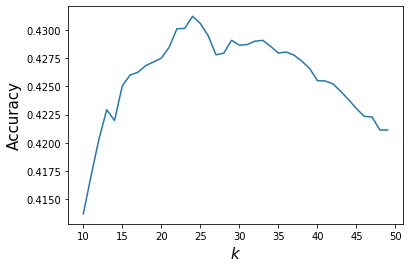

In [17]:
plt.plot(range(10,50), knn_scores["mean_test_score"])
plt.ylabel("Accuracy", fontsize=15)
plt.xlabel("$k$", fontsize=15)

#### Random forest regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

if hyperparameter_tuning:
    gs_rf = GridSearchCV(RandomForestRegressor(n_jobs=-1, random_state=RSEED),
                      param_grid={
                          "n_estimators": [1000, 1200, 1400],
                          "max_depth": [10, 15, 20],
                      })
    gs_rf.fit(X_val, y_val)

    rf_scores = gs_rf.cv_results_
    estimators = gs_rf.best_params_["n_estimators"]
    depth = gs_rf.best_params_["max_depth"]
else:
    estimators = 1000
    depth = 10

print("Best parameters:")
print("\tn_estimators =", estimators)
print("\tmax_depth =", depth)

RF = RandomForestRegressor(n_estimators=estimators, max_depth=depth, n_jobs=-1, random_state=RSEED)
RF.fit(X_train, y_train)
RF.score(X_test, y_test)

Best parameters:
	n_estimators = 1000
	max_depth = 10


0.445208342847028

## Relevant literature

Antonakis, J. (2006). Leadership: What is it and how it is implicated in strategic change? International Journal of Management Cases, 8(4), 17 p.

Antonakis, J., Bastardoz, N., Jacquart, P., & Shamir, B. (2016). Charisma: An ill-defined and ill-measured gift. Annual Review of Organizational Psychology and Organizational Behavior, 3, 293-319.

Antonakis, J., & Eubanks, D.L. (2017). Looking leadership in the face. Current Directions in Psychological Science, 26(3), 270-275.

Antonakis, J., Fenley, M., & Liechti, S. (2011). Can charisma be taught? Tests of two interventions. Academy of Management Learning & Education, 10(3), 374-396.

Antonakis, J., Fenley, M., & Liechti, S. (2012). Learning charisma: Transform yourself into the person others want to follow. Harvard Business Review, 90(6), 127-130.

Garner, P.N., Antonakis, J., Bornet, O., Loupi, D., & Rohner, D. (2018). Deep learning of charisma. Manuscript in preparation.

Jacquart, P., Antonakis, J. (2015). When does charisma matter for top-level leaders? Effect of attributional ambiguity. Academy of Management Journal, 58(4), 1051-1074.

Simonton, D.K. (2006). Presidential IQ, openness, intellectual brilliance, and leadership: Estimates and correlations for 42 U.S. chief executives. Political Psychology, 27(4), 511-526.